In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('data/eu_trade_sums.csv')

In [4]:
df.head()

,geo,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,AT,Export,EU28,193043.0,187548.0,184865.0,181689.0,181889.0,166299.0,143052.0,181180.0,176327.0,159517.0,147064.0,142481.0,131439.0,126666.0,NaN,NaN,NaN
1,AT,Export,EXT_EU28,82468.0,80797.0,78903.0,77668.0,73038.0,63858.0,53376.0,65339.0,62447.0,58309.0,53871.0,46923.0,40317.0,39731.0,NaN,NaN,NaN
2,AT,Import,EU28,215023.0,210492.0,211444.0,212546.0,212734.0,187011.0,160875.0,197137.0,190105.0,175463.0,165908.0,160883.0,144982.0,134624.0,NaN,NaN,NaN
3,AT,Import,EXT_EU28,65242.0,63511.0,64554.0,65337.0,62293.0,52877.0,44262.0,53467.0,47817.0,43097.0,38657.0,31628.0,30994.0,30983.0,NaN,NaN,NaN
4,BE,Export,EU28,517836.0,502888.0,495145.0,486102.0,492083.0,449191.0,402557.0,493688.0,478972.0,446775.0,412912.0,380546.0,349210.0,345248.0,NaN,NaN,NaN


In [5]:
df.dtypes

geo            object
trade_type     object
partner        object
2015          float64
2014          float64
2013          float64
2012          float64
2011          float64
2010          float64
2009          float64
2008          float64
2007          float64
2006          float64
2005          float64
2004          float64
2003          float64
2002          float64
2001          float64
2000          float64
1999          float64
dtype: object

In [6]:
df = df.set_index('geo')

In [7]:
yrs = [str(yr) for yr in range(2002, 2016)]

In [8]:
export_df = df[(df['trade_type'] == 'Export') & 
               (df['partner'] == 'EXT_EU28')].loc[['EU28', 'UK']][yrs].T

In [9]:
export_df.head()

geo,EU28,UK
2002,1770688.0,228493.0
2003,1723332.0,219982.0
2004,1890370.0,229696.0
2005,2098946.0,272441.0
2006,2304970.0,267942.0


In [10]:
export_df = export_df.rename(columns={'EU28': 'EU28_TO_EXT', 'UK': 'UK_TO_EXT'})

In [11]:
export_df = pd.concat([export_df,
                       df[(df['trade_type'] == 'Export') & 
                          (df['partner'] == 'EU28')].loc[
                                                ['EU28', 'UK']][yrs].T], 
                      axis=1)

In [12]:
export_df.head()

geo,EU28_TO_EXT,UK_TO_EXT,EU28,UK
2002,1770688.0,228493.0,3818366.0,364138.0
2003,1723332.0,219982.0,3854353.0,320375.0
2004,1890370.0,229696.0,4173739.0,328835.0
2005,2098946.0,272441.0,4464325.0,355831.0
2006,2304970.0,267942.0,5031897.0,450290.0


In [13]:
export_df = export_df.rename(columns={'EU28': 'EU28_TO_INT', 
                                      'UK': 'UK_TO_INT'})

In [14]:
export_df.head()

geo,EU28_TO_EXT,UK_TO_EXT,EU28_TO_INT,UK_TO_INT
2002,1770688.0,228493.0,3818366.0,364138.0
2003,1723332.0,219982.0,3854353.0,320375.0
2004,1890370.0,229696.0,4173739.0,328835.0
2005,2098946.0,272441.0,4464325.0,355831.0
2006,2304970.0,267942.0,5031897.0,450290.0


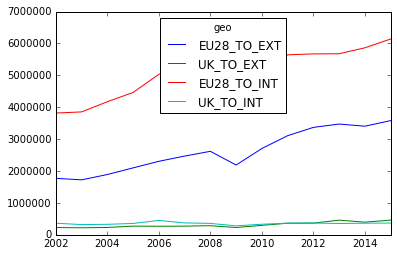

In [15]:
export_df.plot()

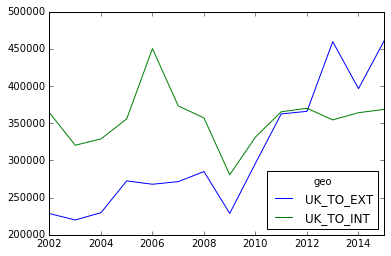

In [16]:
export_df[['UK_TO_EXT', 'UK_TO_INT']].plot()

In [17]:
df = df[~df.index.isin(['EU28'])]

In [18]:
pct_change_df = df.copy()

In [19]:
for yr in yrs:
    pct_change_df[yr] = (df[yr] - df[str(int(yr)-1)]) / df[str(int(yr)-1)]

In [20]:
pct_change_df.head()

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
AT,Export,EU28,0.029299,0.014513,0.017480,-0.001100,0.093747,0.162507,-0.210443,0.027523,0.105381,0.084677,0.032166,0.084009,0.037682,NaN,NaN,NaN,NaN
AT,Export,EXT_EU28,0.020681,0.024004,0.015901,0.063392,0.143756,0.196380,-0.183091,0.046311,0.070967,0.082382,0.148072,0.163851,0.014749,NaN,NaN,NaN,NaN
AT,Import,EU28,0.021526,-0.004502,-0.005185,-0.000884,0.137548,0.162462,-0.183943,0.036990,0.083448,0.057592,0.031234,0.109676,0.076940,NaN,NaN,NaN,NaN
AT,Import,EXT_EU28,0.027255,-0.016157,-0.011984,0.048866,0.178074,0.194636,-0.172162,0.118159,0.109520,0.114856,0.222240,0.020456,0.000355,NaN,NaN,NaN,NaN
BE,Export,EU28,0.029724,0.015638,0.018603,-0.012154,0.095487,0.115844,-0.184592,0.030724,0.072065,0.082010,0.085051,0.089734,0.011476,NaN,NaN,NaN,NaN


In [21]:
[(yr, abs(pct_change_df[yr].min() - pct_change_df[yr].max())) for yr in yrs]

[('2002', nan),
 ('2003', 0.922437290580437),
 ('2004', 1.1973918362807252),
 ('2005', 0.77510836760343016),
 ('2006', 1.0974189015338094),
 ('2007', 0.68337596565606351),
 ('2008', 0.73242893213138349),
 ('2009', 0.41701830776207),
 ('2010', 0.77620824423939028),
 ('2011', 0.64468658836173809),
 ('2012', 0.40757073398065757),
 ('2013', 0.50770193608178382),
 ('2014', 0.69787182660594926),
 ('2015', 0.65402845613708527)]

In [22]:
pct_change_df['2010'].std()

0.11778424716089249

In [23]:
pct_change_df['2010'].mean()

0.20447136781293507

In [24]:
pct_change_df[pct_change_df['2010'].abs() >= (
        pct_change_df['2010'].mean() + pct_change_df['2010'].std() * 2)]

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
BG,Export,EXT_EU28,0.000785,-0.071965,0.045409,0.126386,0.260671,0.489159,-0.322789,0.153392,0.169818,0.266743,0.288433,0.119338,0.058218,NaN,NaN,NaN,NaN
CZ,Import,EXT_EU28,0.102882,0.043694,-0.070514,-0.022636,0.158539,0.452684,-0.259793,0.301929,0.185348,0.266972,0.032504,-0.154460,0.107936,NaN,NaN,NaN,NaN
LT,Export,EXT_EU28,-0.191402,0.006403,0.198597,0.172429,0.276142,0.449822,-0.340340,0.449244,0.075822,0.257226,0.331423,0.067060,0.348454,NaN,NaN,NaN,NaN


In [25]:
pct_change_df['2010'].sort_values()

geo
LU   -0.287050
LU   -0.118591
EL   -0.113044
HR   -0.045526
IE   -0.042371
IE    0.003527
IE    0.039697
DK    0.047805
DK    0.050215
DK    0.053122
HR    0.062120
EL    0.093680
FR    0.106570
PT    0.109449
ES    0.110758
BG    0.111965
MT    0.112542
BE    0.115844
CY    0.117683
FR    0.123650
EL    0.132565
FI    0.136728
DE    0.139136
BE    0.139652
IE    0.142192
DK    0.146256
SI    0.146373
IT    0.147951
SI    0.148808
LU    0.157511
        ...   
PL    0.266329
NL    0.268815
ES    0.277191
BE    0.281675
EL    0.284633
LT    0.288320
SE    0.289761
LV    0.294582
UK    0.294665
MT    0.294668
CZ    0.306317
IT    0.312230
EE    0.312303
SE    0.315566
LV    0.316998
HU    0.318835
SI    0.325969
EE    0.329750
PL    0.336837
SE    0.344466
SK    0.351815
MT    0.357491
SK    0.372937
RO    0.387858
EE    0.389522
MT    0.420200
LT    0.427507
LT    0.449822
CZ    0.452684
BG    0.489159
Name: 2010, dtype: float64

In [26]:
pct_change_df[pct_change_df['2010'] < 0]

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
EL,Import,EU28,-0.011554,0.052153,-0.024641,-0.092378,-0.064558,-0.113044,-0.167735,0.034348,0.121114,0.105525,-0.002684,0.223572,0.242409,NaN,NaN,NaN,NaN
HR,Import,EU28,0.103244,0.178629,0.094336,0.006855,0.104890,-0.045526,-0.285067,0.094356,0.061801,0.131649,0.070830,0.033353,0.126327,NaN,NaN,NaN,NaN
IE,Import,EXT_EU28,0.095668,0.146735,0.097808,0.108564,-0.016647,-0.042371,-0.097875,-0.064441,0.001091,-0.000545,0.082031,-0.042978,-0.028298,NaN,NaN,NaN,NaN
LU,Export,EU28,0.092843,0.062869,-0.027817,-0.037380,0.021101,-0.118591,-0.135602,0.051926,-0.102930,0.190753,0.166059,0.122882,0.100969,NaN,NaN,NaN,NaN
LU,Import,EXT_EU28,0.452790,-0.048928,-0.136559,0.279079,0.032977,-0.287050,-0.062342,0.028338,-0.153985,0.269407,0.294330,0.201769,0.441710,NaN,NaN,NaN,NaN


In [27]:
pct_change_df[pct_change_df['2010'] > .4]

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
BG,Export,EXT_EU28,0.000785,-0.071965,0.045409,0.126386,0.260671,0.489159,-0.322789,0.153392,0.169818,0.266743,0.288433,0.119338,0.058218,NaN,NaN,NaN,NaN
CZ,Import,EXT_EU28,0.102882,0.043694,-0.070514,-0.022636,0.158539,0.452684,-0.259793,0.301929,0.185348,0.266972,0.032504,-0.154460,0.107936,NaN,NaN,NaN,NaN
LT,Export,EXT_EU28,-0.191402,0.006403,0.198597,0.172429,0.276142,0.449822,-0.340340,0.449244,0.075822,0.257226,0.331423,0.067060,0.348454,NaN,NaN,NaN,NaN
LT,Import,EXT_EU28,-0.058658,-0.143427,-0.013144,0.067575,0.288577,0.427507,-0.401784,0.592402,-0.019068,0.135555,0.393113,-0.029152,0.089929,NaN,NaN,NaN,NaN
MT,Import,EXT_EU28,-0.054859,0.427825,0.138429,-0.004228,0.038191,0.420200,-0.055915,-0.068020,-0.092583,0.393204,-0.078005,-0.138767,0.019652,NaN,NaN,NaN,NaN
